### SVM的小例子   
调参入门见下   
http://www.cnblogs.com/pinard/p/6117515.html   
参数与返回值说明及小demo   
https://blog.csdn.net/mmm305658979/article/details/78770600   
大白话原理见下   
https://baijiahao.baidu.com/s?id=1607469282626953830&wfr=spider&for=pc   
拉格朗日乘子法 与 kkt见下   
https://blog.csdn.net/dongba335/article/details/80663908

In [1]:
from sklearn import svm 
import pandas as pd
import numpy as np

In [6]:
from __future__ import division, print_function # 引入3.x版本的除法和打印
from matplotlib import pyplot as plt
# 在notebook中显示绘图结果
%matplotlib inline

# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib
# 设置图片尺寸 14" x 7"
# rc: resource configuration
matplotlib.rc('figure', figsize = (14, 7))
# 设置字体 14
matplotlib.rc('font', size = 14)
# 不显示顶部和右侧的坐标线
matplotlib.rc('axes.spines', top = False, right = False)
# 不显示网格
matplotlib.rc('axes', grid = False)
# 设置背景颜色是白色
matplotlib.rc('axes', facecolor = 'white')

## 线性的例子

In [7]:
#训练样本 
x = [[2,0], [1,1], [2,3]] 
#label 
y = [-1,-1,1] 
clf = svm.SVC(kernel = 'linear') 
clf.fit(x, y)

print("参数设置",clf)  #打印出参数设置情况,只设置了 kernel，其他都是默认 
print("支持向量 ",clf.support_vectors_)  #支持向量 
print("支持向量的索引号 ",clf.support_)  #支持向量的index 在x里是第几个
print("每类支持向量个数",clf.n_support_)  #对于每个类别，分别有几个支持向量 
print("特征系数",clf.coef_)
print("偏值项",clf.intercept_ )
print("决策函数中支持向量的系数，对于多分类为1-vs-1分类器的系数；",clf.dual_coef_)
print("--------------------------对新数据进行预测-----------------------------")
print(clf.predict([[2,0],[0,0],[0,1],[10,10]]))

参数设置 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
支持向量  [[1. 1.]
 [2. 3.]]
支持向量的索引号  [1 2]
每类支持向量个数 [1 1]
特征系数 [[0.4 0.8]]
偏值项 [-2.2]
决策函数中支持向量的系数，对于多分类为1-vs-1分类器的系数； [[-0.4  0.4]]
--------------------------对新数据进行预测-----------------------------
[-1 -1 -1  1]


In [8]:
df_demo_data=pd.DataFrame(x,columns=["x1","x2"])
df_demo_data["label"]=y
df_demo_data

,x1,x2,label
0,2,0,-1
1,1,1,-1
2,2,3,1


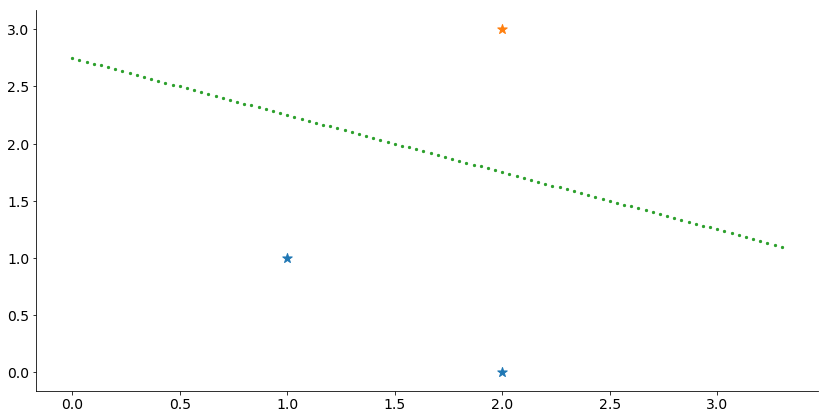

In [9]:
g=df_demo_data.groupby("label")
for a,b in g:
    p1 = plt.scatter(b["x1"].values, b["x2"].values, marker='*', label=a, s=100)
w=clf.coef_
b=clf.intercept_
x=[i/30 for i in range(100)]
y=[(22-4*i)/8 for i in x]
p2 = plt.scatter(x, y, marker=".", label=a, s=20)
plt.show()

## 高斯核的例子

In [10]:
x1=np.random.randn(1000, 2)
x1

array([[ 2.11474236, -1.08945369],
       [ 1.75987956, -0.40987018],
       [ 0.13310274,  1.35811505],
       ...,
       [-0.33484095,  1.81829528],
       [ 0.70154472,  0.94012605],
       [-1.67176643, -0.25123243]])

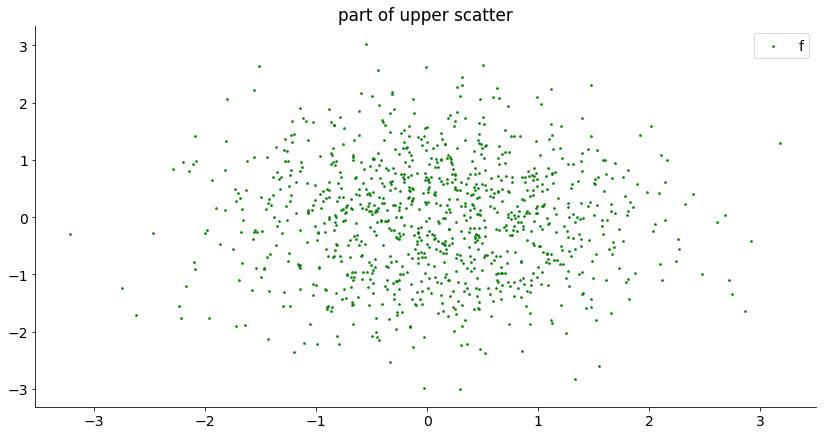

In [11]:
p_1 = plt.scatter(x1[:,0], x1[:,1], marker='*', color='g', label='f', s=5,alpha=0.8)
plt.title('part of upper scatter')
plt.legend(loc='upper right')
plt.show()

In [12]:
label=[ 1 if i[0]*i[0]+i[1]*i[1]>1 else -1 for i in x1]
data = pd.DataFrame(x1,columns=["x1","x2"])
data["label"]=label
data

,x1,x2,label
0,2.114742,-1.089454,1
1,1.759880,-0.409870,1
2,0.133103,1.358115,1
3,2.161994,0.999426,1
4,0.987084,2.100198,1
5,-0.978346,-0.271518,1
6,1.512234,0.580104,1
7,-0.303870,0.206663,-1
8,1.571531,-0.042934,1
9,-0.048695,-0.692716,-1


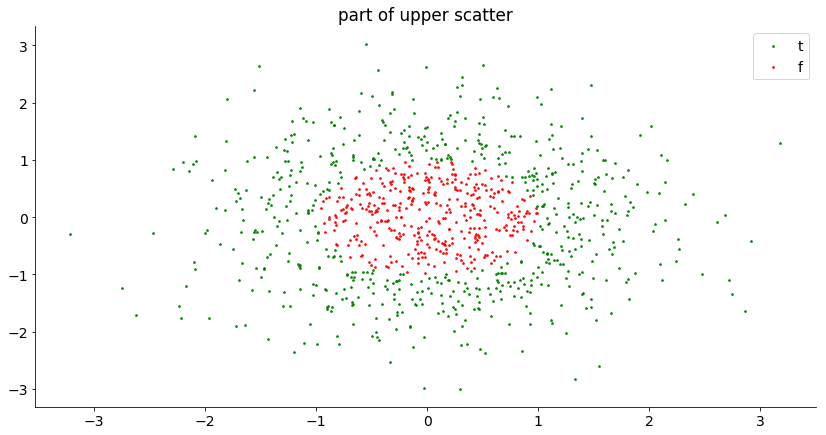

In [13]:
#划分一下正负样本
t_case=data[data["label"]>0]
f_case=data[data["label"]<0]
p_t = plt.scatter(t_case["x1"].values, t_case["x2"], marker='*', color='g', label='t', s=5,alpha=0.8)
p_f = plt.scatter(f_case["x1"].values, f_case["x2"], marker='*', color='r', label='f', s=5,alpha=0.8)
plt.title('part of upper scatter')
plt.legend(loc='upper right')
plt.show()

In [14]:
clf_l = svm.SVC(kernel = 'linear',class_weight=None,C=50)
clf_l.fit(data.iloc[:,:2].values, data["label"].values)
print("参数设置",clf_l)  #打印出参数设置情况,只设置了 kernel，其他都是默认 
# print("支持向量 ",clf_l.support_vectors_)  #支持向量 
# print("支持向量的index ",clf_l.support_)  #支持向量的index 
print("每类支持向量个数",clf_l.n_support_)  #对于每个类别，分别有几个支持向量 
print("特征系数",clf_l.coef_)
print("偏值项",clf_l.intercept_ )
# print("决策函数中支持向量的系数，对于多分类为1-vs-1分类器的系数；",clf_l.dual_coef_)

参数设置 SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
每类支持向量个数 [376 397]
特征系数 [[ 1.93855589e-04 -2.70162417e-05]]
偏值项 [0.99997121]


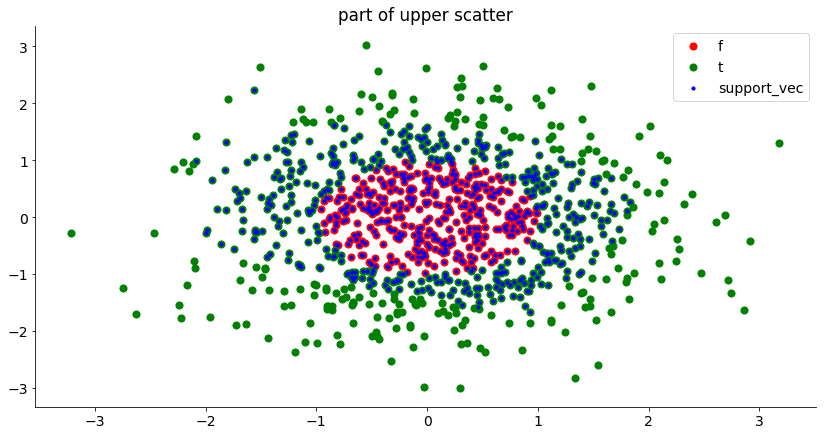

In [15]:
sv=clf_l.support_vectors_
p_f = plt.scatter(f_case["x1"].values, f_case["x2"], marker='o', color='r', label='f', s=50,alpha=1)
p_t = plt.scatter(t_case["x1"].values, t_case["x2"], marker='o', color='g', label='t', s=50,alpha=1)

p_v = plt.scatter(sv[:,0].tolist(), sv[:,1].tolist(), marker='o', color='b', label='support_vec', s=10,alpha=1)
plt.title('part of upper scatter')
plt.legend(loc='upper right')
plt.show()

In [16]:
clf_rbf = svm.SVC(kernel = 'rbf',C=3,class_weight="balanced")
clf_rbf.fit(data.iloc[:,:2].values, data["label"].values)
print("参数设置",clf_rbf)  #打印出参数设置情况,只设置了 kernel，其他都是默认 
# print("支持向量 ",clf_rbf.support_vectors_)  #支持向量 
# print("支持向量的index ",clf_rbf.support_)  #支持向量的index 
print("每类支持向量个数",clf_rbf.n_support_)  #对于每个类别，分别有几个支持向量 
# print("特征系数",clf_rbf.coef_)
print("偏值项",clf_rbf.intercept_ )
# print("决策函数中支持向量的系数，对于多分类为1-vs-1分类器的系数；",clf_rbf.dual_coef_)

参数设置 SVC(C=3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
每类支持向量个数 [50 81]
偏值项 [4.70904131]


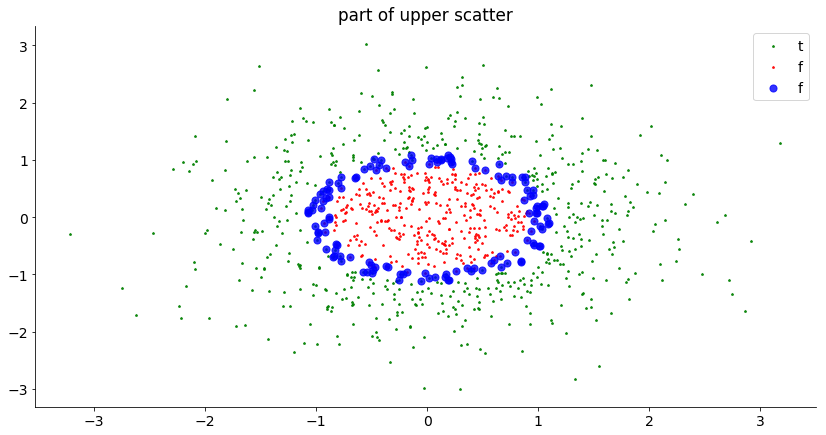

In [17]:
sv=clf_rbf.support_vectors_
p_t = plt.scatter(t_case["x1"].values, t_case["x2"], marker='*', color='g', label='t', s=5,alpha=0.8)
p_f = plt.scatter(f_case["x1"].values, f_case["x2"], marker='*', color='r', label='f', s=5,alpha=0.8)
p_v = plt.scatter(sv[:,0].tolist(), sv[:,1].tolist(), marker='o', color='b', label='f', s=50,alpha=0.8)
plt.title('part of upper scatter')
plt.legend(loc='upper right')
plt.show()